In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("data/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

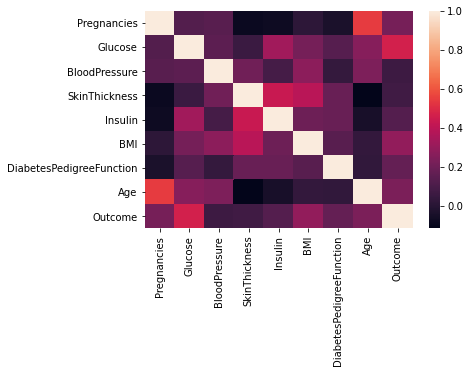

In [7]:
sns.heatmap(df.corr())

In [8]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [10]:
X = df.drop(columns= 'Outcome',axis=1)
y =df['Outcome']

In [11]:
### data standarisation

from sklearn.preprocessing import StandardScaler



In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(X)

StandardScaler()

In [14]:
X = scaler.transform(X)

In [15]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [16]:
y 

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [17]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [18]:
X_train.shape

(614, 8)

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [20]:
classifier = SVC(kernel='linear')

In [21]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [22]:
y_pred = classifier.predict(X_test)

In [23]:
accuracy = accuracy_score(y_pred,y_test)

In [24]:
accuracy

0.7792207792207793

In [25]:
A = (3,78,50,32,88,31,0.248,26)
def predict(classifier,x):
    B = np.asarray(A)
    x = B.reshape(1,-1)
    print(classifier.predict(x))
    

In [26]:
predict(classifier,(2,141,58,34,128,25.4,0.699,24))

[1]


In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[89, 10],
       [24, 31]], dtype=int64)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

In [31]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=9))

In [32]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [33]:
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN
                 }

In [34]:
def evaluation(model):
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4,scoring ='f1', train_sizes=np.linspace(0.1,1,10))
    
    plt.figure(figsize = (12,8))
    plt.plot(N,train_score.mean(axis=1), label = 'train_score')
    plt.plot(N,val_score.mean(axis=1), label = 'val_score')
    plt.legend()

RandomForest
[[87 12]
 [18 37]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        99
           1       0.76      0.67      0.71        55

    accuracy                           0.81       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.80      0.81      0.80       154

AdaBoost
[[83 16]
 [16 39]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        99
           1       0.71      0.71      0.71        55

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154

SVM
[[90  9]
 [25 30]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        99
           1       0.77      0.55      0.64        55

    accuracy                           0.78       154
   macro avg       0.78      0.73      0.74  

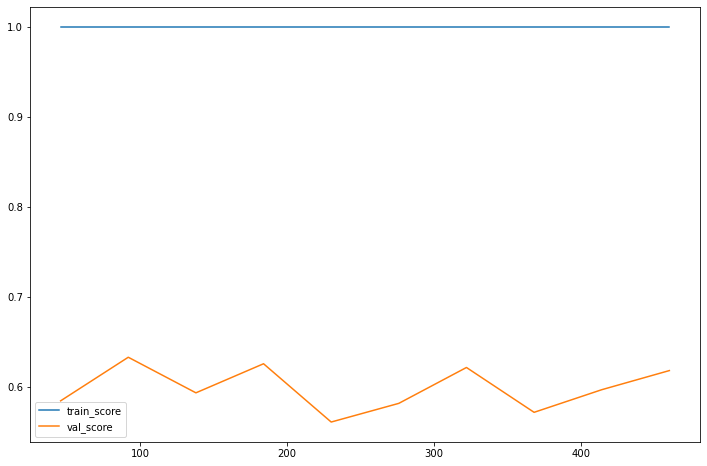

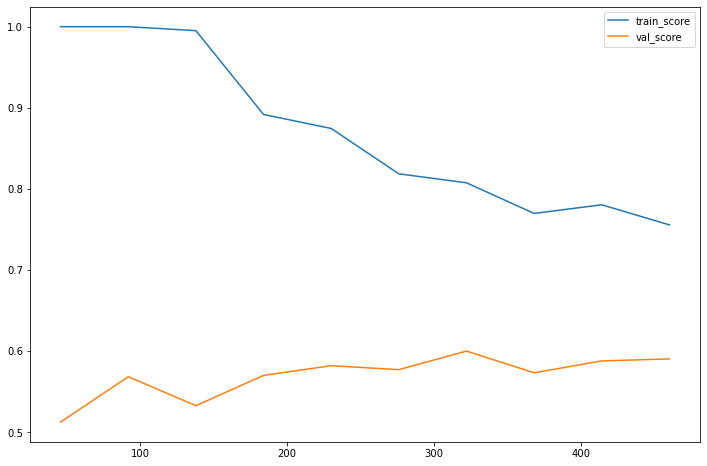

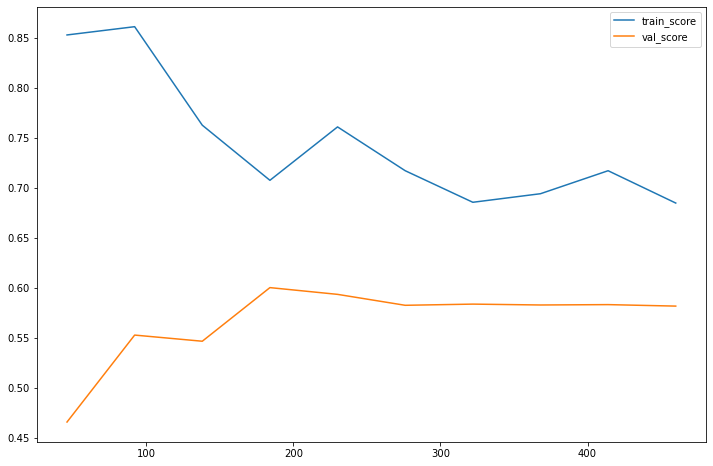

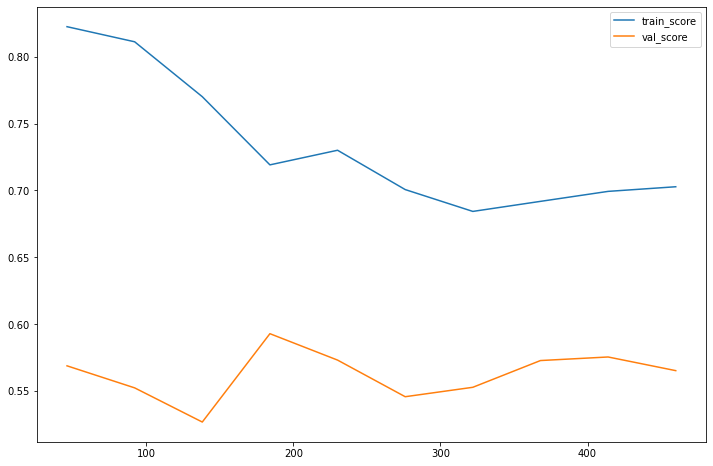

In [35]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

In [36]:
hyper_params = {  'n_estimators': [50, 100, 200],  # Nombre d'estimateurs dans l'ensemble AdaBoost
    'learning_rate': [0.01, 0.1, 1.0],  # Taux d'apprentissage pour AdaBoost
    'base_estimator': [None],  # Utilisation des arbres de décision faibles par défaut
    'algorithm': ['SAMME', 'SAMME.R'],  # Algorithme pour calculer les poids des échantillons
    'random_state': [42]  # Pour rendre les résultats reproductibles
}

In [37]:
# Définir la grille des hyperparamètres à rechercher

# Créer un objet AdaBoostClassifier
adaboost = AdaBoostClassifier()

# Créer un objet GridSearchCV pour rechercher les meilleurs hyperparamètres
grid_search = GridSearchCV(adaboost, hyper_params, cv=5, scoring='accuracy')

# Exécuter la recherche sur grille
grid_search.fit(X, y)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres trouvés :", grid_search.best_params_)
y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))

Meilleurs paramètres trouvés : {'algorithm': 'SAMME', 'base_estimator': None, 'learning_rate': 0.1, 'n_estimators': 50, 'random_state': 42}
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        99
           1       0.80      0.60      0.69        55

    accuracy                           0.81       154
   macro avg       0.81      0.76      0.77       154
weighted avg       0.81      0.81      0.80       154



In [38]:
N, train_score, val_score = learning_curve(adaboost, X_train, y_train, cv=4,scoring ='f1', train_sizes=np.linspace(0.1,1,10))

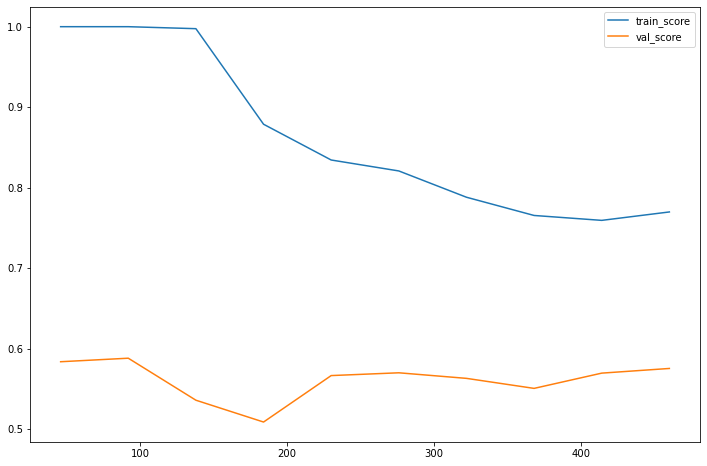

In [39]:
plt.figure(figsize = (12,8))
plt.plot(N,train_score.mean(axis=1), label = 'train_score')
plt.plot(N,val_score.mean(axis=1), label = 'val_score')
plt.legend()

In [40]:
grid_search.best_score_

0.7670231729055258

In [47]:
A = (3,78,50,32,88,31,0.248,26)
def predict(grid_search,A):
    B = np.asarray(A)
    C = B.reshape(1,-1)
    x= scaler.transform(C)
    print(classifier.predict(x))
    

In [50]:
predict(grid_search,(1,163,72,0,0,39,1.222,33))

[1]
